In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

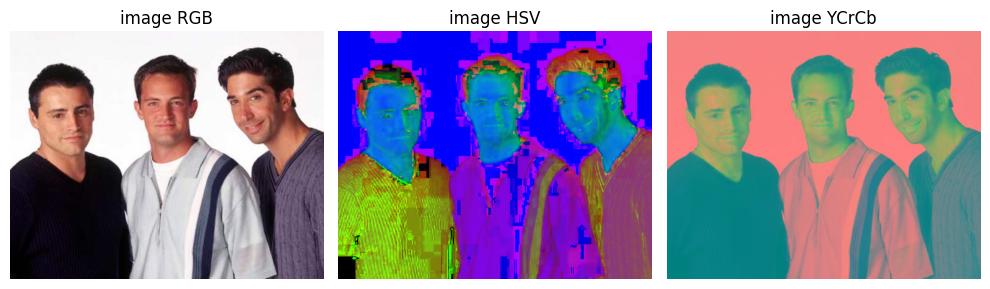

In [2]:
image = cv2.imread('./picture.jpg')
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_YCrCb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

plt.figure(figsize=(10, 8))
plt.subplot(131)
plt.imshow(image_RGB)
plt.title('image RGB')
plt.axis('off')
plt.subplot(132)
plt.imshow(image_HSV)
plt.title('image HSV')
plt.axis('off')
plt.subplot(133)
plt.imshow(image_YCrCb)
plt.title('image YCrCb')
plt.axis('off')

plt.tight_layout()
plt.show()

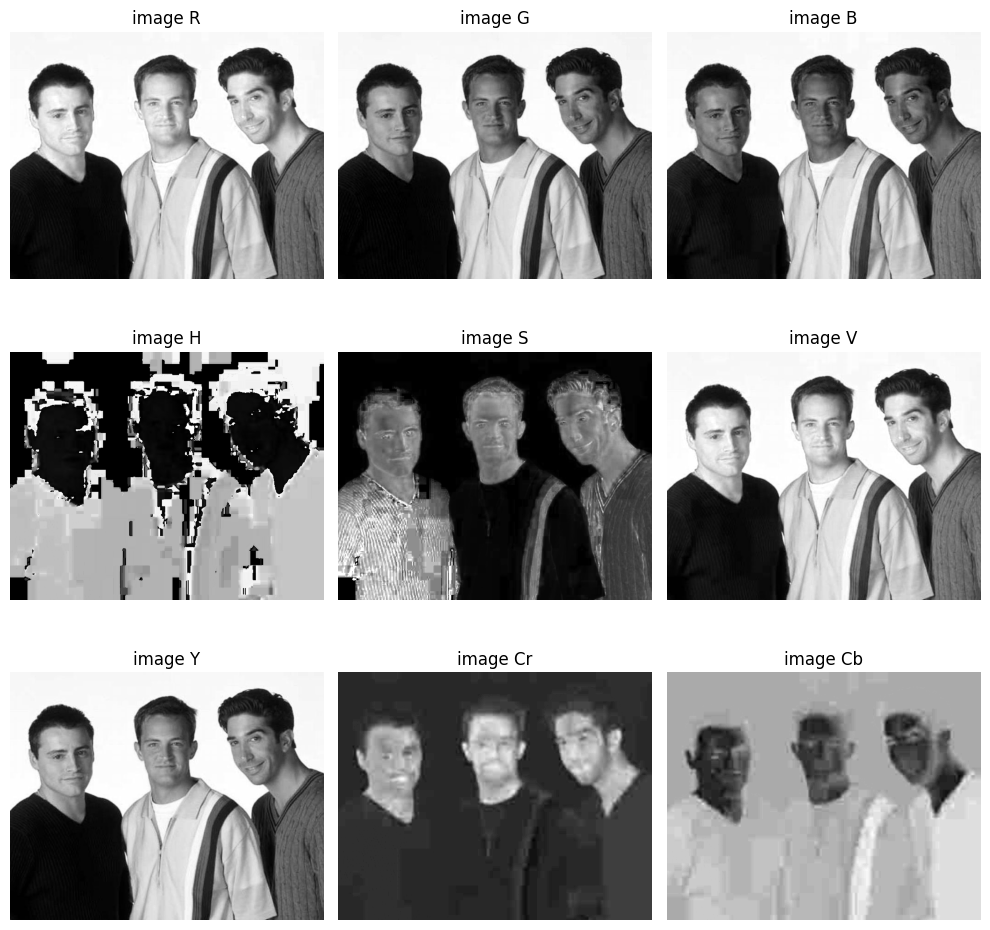

In [3]:

image_R = image_RGB[:, :, 0]
image_G = image_RGB[:, :, 1]
image_B = image_RGB[:, :, 2]

image_H = image_HSV[:, :, 0]
image_S = image_HSV[:, :, 1]
image_V = image_HSV[:, :, 2]

image_Y = image_YCrCb[:, :, 0]
image_Cr = image_YCrCb[:, :, 1]
image_Cb = image_YCrCb[:, :, 2]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

ax[0, 0].imshow(image_R, cmap='gray')
ax[0, 0].set_title('image R')
ax[0, 0].axis('off')

ax[0, 1].imshow(image_G, cmap='gray')
ax[0, 1].set_title('image G')
ax[0, 1].axis('off')

ax[0, 2].imshow(image_B, cmap='gray')
ax[0, 2].set_title('image B')
ax[0, 2].axis('off')

ax[1, 0].imshow(image_H, cmap='gray')
ax[1, 0].set_title('image H')
ax[1, 0].axis('off')

ax[1, 1].imshow(image_S, cmap='gray')
ax[1, 1].set_title('image S')
ax[1, 1].axis('off')

ax[1, 2].imshow(image_V, cmap='gray')
ax[1, 2].set_title('image V')
ax[1, 2].axis('off')

ax[2, 0].imshow(image_Y, cmap='gray')
ax[2, 0].set_title('image Y')
ax[2, 0].axis('off')

ax[2, 1].imshow(image_Cr, cmap='gray')
ax[2, 1].set_title('image Cr')
ax[2, 1].axis('off')

ax[2, 2].imshow(image_Cb, cmap='gray')
ax[2, 2].set_title('image Cb')
ax[2, 2].axis('off')

plt.tight_layout()
plt.show()

In [4]:
image_r = image_R / (image_R + image_G + image_B + 1e-10)
image_g = image_G / (image_R + image_G + image_B + 1e-10)
image_b = image_B / (image_R + image_G + image_B + 1e-10)

# image_h = image_HSV[:, :, 0]
# image_s = image_HSV[:, :, 1]
# image_v = image_HSV[:, :, 2]

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

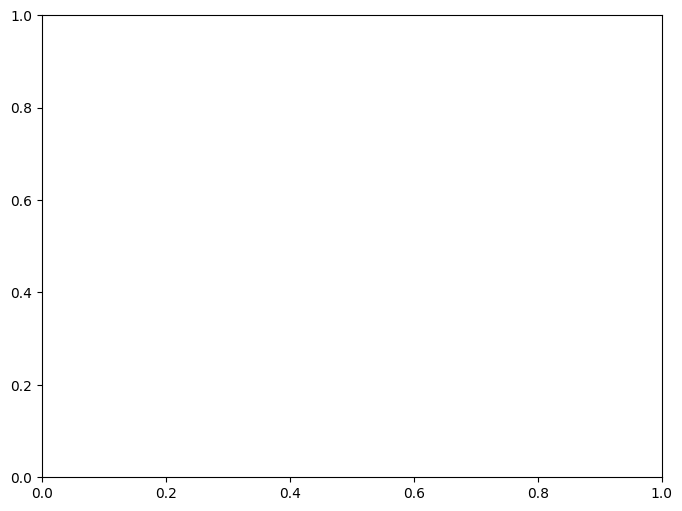

In [25]:
# Chuyển đổi sang không gian màu normalized RGB và tính toán tọa độ màu chuẩn hóa
normalized_image = image_RGB.astype(np.float32)

R, G, B = normalized_image[:, :, 0], normalized_image[:, :, 1], normalized_image[:, :, 2]

r = R / (R + G + B + 1e-10)
g = G / (R + G + B + 1e-10)
b = B / (R + G + B + 1e-10)

# Plot g versus r
plt.figure()
plt.scatter(r.flatten(), g.flatten(), s=1)  # Scatter plot for r and g


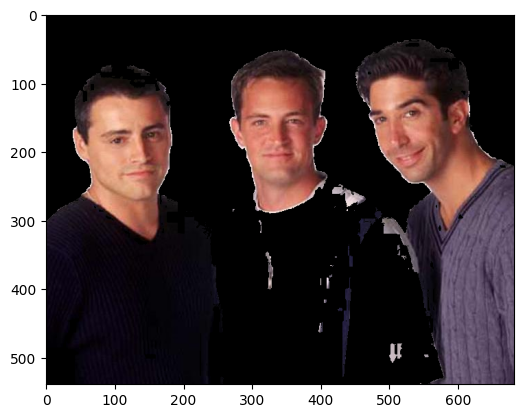

In [8]:

# Define your function f(r, g) here if it's not already defined

# Example function f (replace this with your actual function)
def f(r, g):
    return r - g

mask = f(r, g) >= 0.02

# Create an output image by applying the mask
outputImage = np.copy(image_RGB)
outputImage[~mask] = 0

# Display the output image
plt.imshow(outputImage)
plt.show()

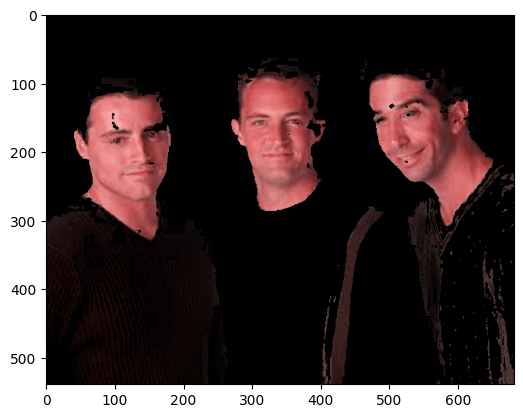

In [9]:
normalized_image_hsv = image_HSV.astype(np.float32) / 255.0
# Extract hue and saturation channels
H = normalized_image_hsv[:, :, 0]
S = normalized_image_hsv[:, :, 1]

# Define the rules for determining face pixels
a = 0
b = 0.6
c = 0.3
d = 0.9

# Create a mask based on the rules
mask2 = (H >= a) & (H <= b) & (S >= c) & (S <= d)

# Create an output image by applying the mask
outputImage2 = np.copy(normalized_image_hsv)
outputImage2[~mask2] = 0

# Display the output image
plt.imshow(cv2.cvtColor(outputImage2, cv2.COLOR_HSV2RGB))
plt.show()




In [11]:
def get_hsv_mask(img, debug=False):
    lower_thresh = np.array([0, 20, 120], dtype=np.uint8)
    upper_thresh = np.array([10, 100, 250], dtype=np.uint8)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    msk_hsv = cv2.inRange(img_hsv, lower_thresh, upper_thresh)

    msk_hsv[msk_hsv < 128] = 0
    msk_hsv[msk_hsv >= 128] = 1

    # if debug:
    #     scripts.display('input', img)
    #     scripts.display('mask_hsv', msk_hsv)

    return msk_hsv.astype(float)

In [12]:
def get_ycrcb_mask(img, debug=False):
    # assert isinstance(img, np.ndarray), 'image must be a np array'
    # assert img.ndim == 3, 'skin detection can only work on color images'
    # logger.debug('getting ycrcb mask')

    lower_thresh = np.array([0, 80, 130], dtype=np.uint8)
    upper_thresh = np.array([255, 120, 200], dtype=np.uint8)

    img_ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCR_CB)
    msk_ycrcb = cv2.inRange(img_ycrcb, lower_thresh, upper_thresh)

    msk_ycrcb[msk_ycrcb < 128] = 0
    msk_ycrcb[msk_ycrcb >= 128] = 1

    # if debug:
    #     scripts.display('input', img)
    #     scripts.display('mask_ycrcb', msk_ycrcb)

    return msk_ycrcb.astype(float)


In [13]:
image = cv2.imread('./vaa.jpg')
uoa = get_ycrcb_mask(image)

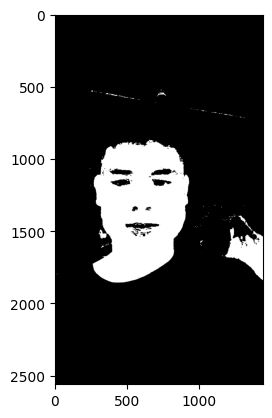

In [14]:
plt.imshow(uoa, cmap='gray')

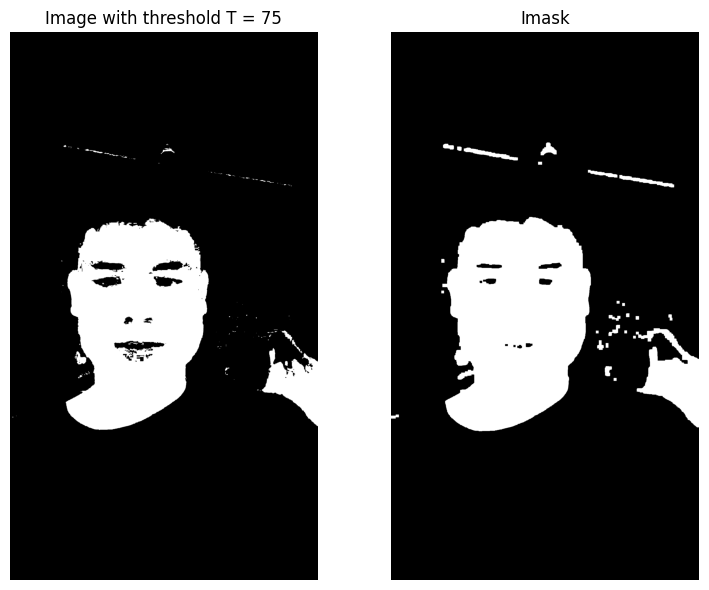

In [15]:
kernel = np.ones((3, 3), np.uint8)

dilation = cv2.dilate(src=uoa, kernel=kernel, iterations=10)
erosion = cv2.erode(dilation, kernel, iterations=4)

Imask = erosion

plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.imshow(uoa, cmap='gray')
plt.title("Image with threshold T = 75")
plt.axis('off')
plt.subplot(122)
plt.imshow(Imask, cmap='gray')
plt.title("Imask")
plt.axis('off')
plt.tight_layout()
plt.show()


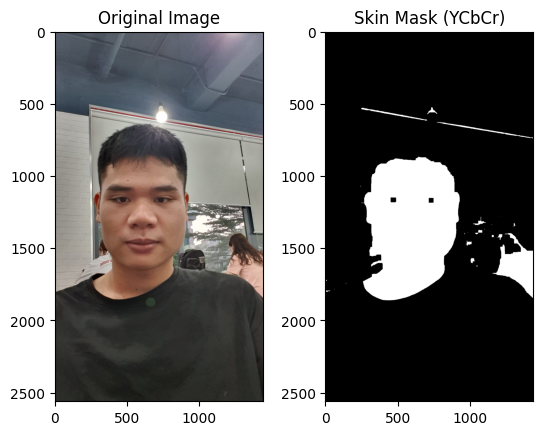

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ file
img = cv2.imread('./vaa.jpg')

# Chuyển đổi không gian màu sang YCbCr
img_ycbcr = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

channel_Cr = img_ycbcr[:, :, 1]

# Lấy kênh Cb
channel_Cb = img_ycbcr[:, :, 2]

# Đặt ngưỡng để tách da mặt
threshold_value = 120
mask_skin = (channel_Cb <= 120) & (channel_Cr >= 130).astype(np.uint8) * 255

# Áp dụng morphological transformations để loại bỏ nhiễu và kết hợp vùng màu da
kernel = np.ones((8, 8), np.uint8)
# mask_skin = cv2.morphologyEx(mask_skin, cv2.MORPH_OPEN, kernel)
# mask_skin = cv2.morphologyEx(mask_skin, cv2.MORPH_CLOSE, kernel)

mask_skin = cv2.dilate(src=mask_skin, kernel=kernel, iterations=4)
mask_skin = cv2.erode(mask_skin, kernel, iterations=4)

# Hiển thị ảnh gốc và mask
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(mask_skin, cmap='gray')
plt.title('Skin Mask (YCbCr)')

plt.show()


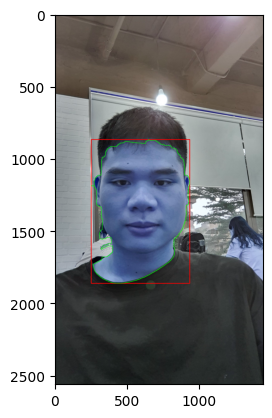

In [18]:
contours, _ = cv2.findContours(mask_skin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Tìm contour có diện tích lớn nhất
max_contour = max(contours, key=cv2.contourArea)

# Lấy tọa độ và kích thước hình chữ nhật bao quanh contour lớn nhất
x, y, w, h = cv2.boundingRect(max_contour)

# Vẽ khung hình chữ nhật trên ảnh gốc
# result_image = cv2.cvtColor(mask_skin, cv2.COLOR_GRAY2RGB)
cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)
cv2.drawContours(img, [max_contour], -1, (0, 255, 0), 2)
plt.imshow(img)

# # Tạo ảnh trắng để vẽ contour lớn nhất
# largest_area_image = np.zeros_like(mask_skin)

# # Vẽ contour lớn nhất trên ảnh trắng
# largest_area_image = cv2.drawContours(largest_area_image, [max_contour], 0, 255, thickness=cv2.FILLED)

# plt.imshow(largest_area_image)

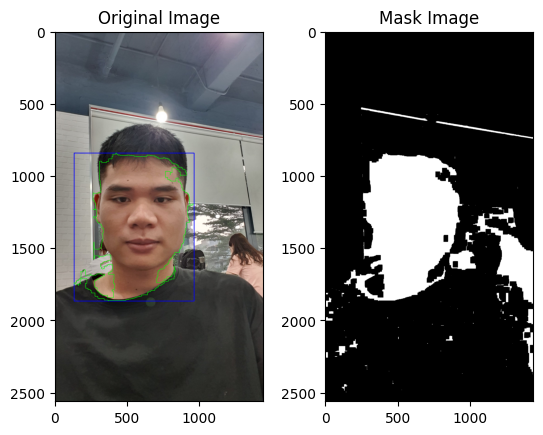

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ file
img = cv2.imread('./vaa.jpg')

# Chuyển đổi không gian màu sang HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Hiển thị histogram của kênh Value (độ sáng)
hist_value = cv2.calcHist([img_hsv], [2], None, [256], [0, 256])

# Tính ngưỡng để xác định khoảng độ sáng của vùng da mặt
threshold_value = 0.5  # Giả sử 50% giá trị cao nhất
max_value_index = np.argmax(hist_value)
lower_value_thresh = max_value_index * threshold_value
upper_value_thresh = 255

# Định nghĩa khoảng ngưỡng màu trong không gian HSV
lower_thresh = np.array([0, 20, int(lower_value_thresh)], dtype=np.uint8)
upper_thresh = np.array([10, 255, 255], dtype=np.uint8)

# Tạo mask dựa trên khoảng ngưỡng màu
msk_hsv = cv2.inRange(img_hsv, lower_thresh, upper_thresh)

# Áp dụng morphological transformations để loại bỏ nhiễu và kết hợp vùng màu da
kernel = np.ones((8, 8), np.uint8)
# mask_skin = cv2.morphologyEx(mask_skin, cv2.MORPH_OPEN, kernel)
# mask_skin = cv2.morphologyEx(mask_skin, cv2.MORPH_CLOSE, kernel)

msk_hsv = cv2.dilate(src=msk_hsv, kernel=kernel, iterations=4)
msk_hsv = cv2.erode(msk_hsv, kernel, iterations=4)

contours, _ = cv2.findContours(msk_hsv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Tìm contour có diện tích lớn nhất
max_contour = max(contours, key=cv2.contourArea)

# Lấy tọa độ và kích thước hình chữ nhật bao quanh contour lớn nhất
x, y, w, h = cv2.boundingRect(max_contour)

# Vẽ khung hình chữ nhật trên ảnh gốc
# result_image = cv2.cvtColor(mask_skin, cv2.COLOR_GRAY2RGB)
cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)
cv2.drawContours(img, [max_contour], -1, (0, 255, 0), 2)

# Hiển thị ảnh gốc và mask
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(msk_hsv, cmap='gray')
plt.title('Mask Image')

plt.show()


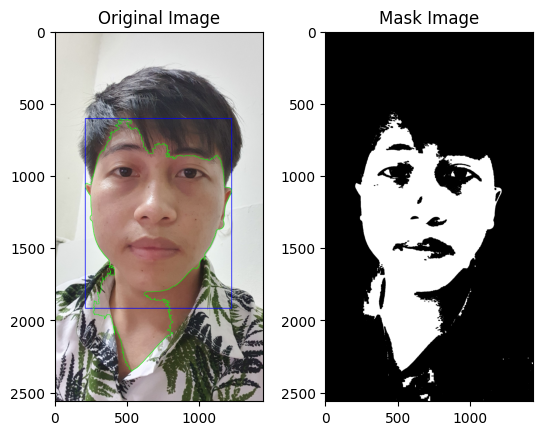

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ file
img = cv2.imread('./uoa1.jpg')

# Chuyển đổi không gian màu sang YCrCb
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# Hiển thị histogram của kênh Y (độ sáng)
hist_Y = cv2.calcHist([img_ycrcb], [0], None, [256], [0, 256])

# Tính ngưỡng để xác định khoảng độ sáng của vùng da mặt
threshold_Y = 0.5  # Giả sử 50% giá trị cao nhất
max_Y_index = np.argmax(hist_Y)
lower_Y_thresh = max_Y_index * threshold_Y
upper_Y_thresh = 255

# Định nghĩa khoảng ngưỡng màu trong không gian YCrCb
lower_thresh_Y = np.array([int(lower_Y_thresh), 135, 85], dtype=np.uint8)
upper_thresh_Y = np.array([255, 180, 135], dtype=np.uint8)

# Tạo mask dựa trên khoảng ngưỡng màu
msk_ycrcb = cv2.inRange(img_ycrcb, lower_thresh_Y, upper_thresh_Y)

# Áp dụng morphological transformations để loại bỏ nhiễu và kết hợp vùng màu da
kernel = np.ones((3, 5), np.uint8)
msk_ycrcb = cv2.dilate(src=msk_ycrcb, kernel=kernel, iterations=2)
msk_ycrcb = cv2.erode(msk_ycrcb, kernel, iterations=2)

contours, _ = cv2.findContours(msk_ycrcb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Tìm contour có diện tích lớn nhất
max_contour = max(contours, key=cv2.contourArea)

# Lấy tọa độ và kích thước hình chữ nhật bao quanh contour lớn nhất
x, y, w, h = cv2.boundingRect(max_contour)

# Vẽ khung hình chữ nhật trên ảnh gốc
cv2.rectangle(img, (x, y), (x + w, y + h*3 // 4), (255, 0, 0), 3)
cv2.drawContours(img, [max_contour], -1, (0, 255, 0), 2)

# Hiển thị ảnh gốc và mask
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(msk_ycrcb, cmap='gray')
plt.title('Mask Image')

plt.show()


(array([59., 94., 70., 15.,  2.,  2.,  2.,  4.,  3.,  5.]),
 array([    0.,  7145., 14290., 21435., 28580., 35725., 42870., 50015.,
        57160., 64305., 71450.]),
 <BarContainer object of 10 artists>)

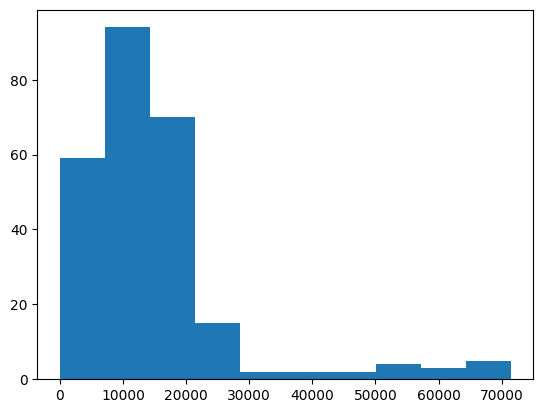

In [21]:
plt.hist(hist_Y)

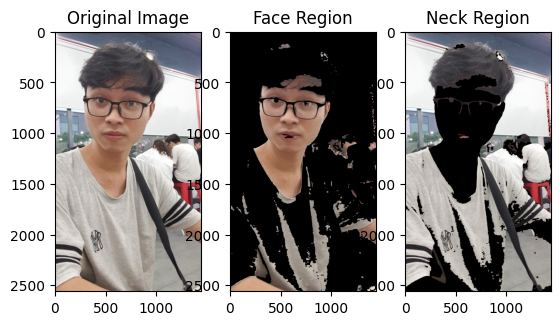

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pick_color_face(image):
    # Chọn màu da khuôn mặt
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Chuyển đổi ảnh sang không gian màu HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Tạo mask cho vùng màu da
    mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    # Áp dụng morphological transformations để loại bỏ nhiễu và kết hợp vùng màu da
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    return mask

def separate_face_and_neck(image_path):
    # Đọc ảnh từ file
    img = cv2.imread(image_path)

    # Lấy mask cho vùng mặt
    face_mask = pick_color_face(img)

    # Kết hợp mask để tạo vùng mặt
    face_image = cv2.bitwise_and(img, img, mask=face_mask)

    # Loại bỏ cổ bằng cách lấy phần ngược của mask
    neck_mask = cv2.bitwise_not(face_mask)
    neck_image = cv2.bitwise_and(img, img, mask=neck_mask)

    # Hiển thị ảnh gốc, vùng mặt, và vùng cổ
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
    plt.title('Face Region')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(neck_image, cv2.COLOR_BGR2RGB))
    plt.title('Neck Region')

    plt.show()

# Thay đổi đường dẫn đến ảnh của bạn
image_path = './dada.jpg'

# Gọi hàm separate_face_and_neck
separate_face_and_neck(image_path)


In [23]:
import cv2
import numpy as np

def pick_color_face(image):
    # Chọn màu da khuôn mặt
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Chuyển đổi ảnh sang không gian màu HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Tạo mask cho vùng màu da
    mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    # Áp dụng morphological transformations để loại bỏ nhiễu và kết hợp vùng màu da
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Tìm contours của vùng màu da
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Chọn vùng có diện tích lớn nhất làm vùng khuôn mặt
    if contours:
        max_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(max_contour)
        return x, y, x + w, y + h

    return None

def detect_face_with_template(image, template_path):
    # Đọc ảnh template khuôn mặt
    template = cv2.imread(template_path, cv2.IMREAD_COLOR)

    # Chọn vùng màu da trong ảnh đầu vào
    face_roi = pick_color_face(image)

    if face_roi:
        # Tạo ảnh con của vùng màu da trong ảnh đầu vào
        face_region = image[face_roi[1]:face_roi[3], face_roi[0]:face_roi[2]]

        # Thực hiện template matching
        result = cv2.matchTemplate(face_region, template, cv2.TM_CCOEFF_NORMED)
        _, _, _, max_loc = cv2.minMaxLoc(result)

        # Tính toán vị trí tuyệt đối của khuôn mặt trong ảnh gốc
        top_left = (face_roi[0] + max_loc[0], face_roi[1] + max_loc[1])
        bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])

        # Vẽ hình chữ nhật xung quanh khuôn mặt
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

        # Hiển thị ảnh
        cv2.imshow('Detected Face', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Không tìm thấy khuôn mặt trong ảnh.")



In [24]:

# Đường dẫn đến ảnh đầu vào
image_path = './uoa1.jpg'

# Đường dẫn đến template khuôn mặt
template_path = './template.png'

# Đọc ảnh đầu vào
input_image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Gọi hàm detect_face_with_template
detect_face_with_template(input_image, template_path)